In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import test1 as t
%matplotlib inline
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# This is to find the number of rows and columns in the dataset. 
# check_rows_cols(x,y) is a function in the file test1 which we imported as t. 
#This checks the number of rows and columns that you got against the solution
num_rows = df.shape[0]
num_cols = df.shape[1]
t.check_rows_cols(num_rows, num_cols)

Nice job there are 19102 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [4]:
#If you wanto to know more about what the test function is expecting, 
#you can read the documentation the same way as any other function
t.check_rows_cols?

In [5]:
# df.isnull() This function takes a scalar or array-like object and indicates whether values are missing

# numpy.sum() function in Python returns the sum of array elements along with the specified axis. 
#So to get the sum of all element by rows or by columns numpy.sum() function is used
#sum of all the missing values in each column
# np.sum(df.isnull()) This shows the number of missing values in each column
# np.sum(df.isnull()) == 0 this is used to convert the answer to boolean so if a column has 0 missing values,
# it shows True if otherwise, False.

#df.columns[np.sum(df.isnull()) == 0] This is used to put all the columns with the boolean "True" into a list

In [6]:
3 #provide a set of columns with 0 missing values
no_nulls = set(df.columns[np.sum(df.isnull()) == 0])
t.no_null_cols(no_nulls)

Nice job that looks right!


In [7]:
#Provide a set of column names with more than 75% of their values missing
set(df.columns[(np.sum(df.isnull()))/df.shape[0] > .75])
"""
This prvides a set with the column names that have more than 755 of their values missing. 
Remember that each column has the same amount of values (i.e the number of rows) 
which can be easily gotten using df.shape[0] 
You are basically dividing the number of missing values of each column by  the number of rows 
(which is the same for every column). 
You then compare to greater than 0.75, this produces a boolean value (True or False) and
df.columns puts the column names that have the boolean value "True" into a list
set() converts that list to a SET
"""


'\nThis prvides a set with the column names that have more than 755 of their values missing. \nRemember that each column has the same amount of values (i.e the number of rows) \nwhich can be easily gotten using df.shape[0] \nYou are basically dividing the number of missing values of each column by  the number of rows \n(which is the same for every column). \nYou then compare to greater than 0.75, this produces a boolean value (True or False) and\ndf.columns puts the column names that have the boolean value "True" into a list\nset() converts that list to a SET\n'

In [8]:
most_missing_cols = set(df.columns[(np.sum(df.isnull()))/df.shape[0] > .75])

t.most_missing_cols(most_missing_cols)

Nice job that looks right!


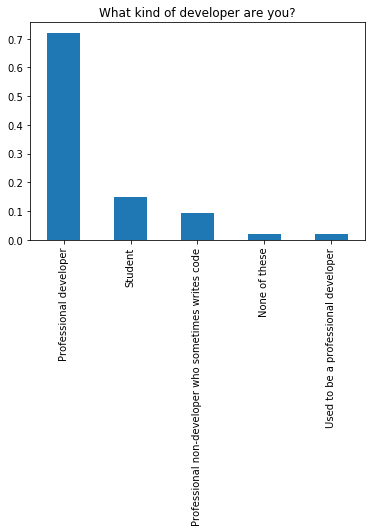

In [9]:
# Provide a pandas series of the different Professional status values in the dataset along with the count of the number of individuals with each status
#Store the pandas series in status_vals. If you are correct you should see a bar chart of the proportion of individuals in each status
status_vals = df['Professional'].value_counts()
"""
The value_counts() function is used to get a Series containing counts of unique values.
The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
Excludes NA values by default.
"""
(status_vals/df.shape[0]).plot(kind = 'bar');
plt.title("What kind of developer are you?");


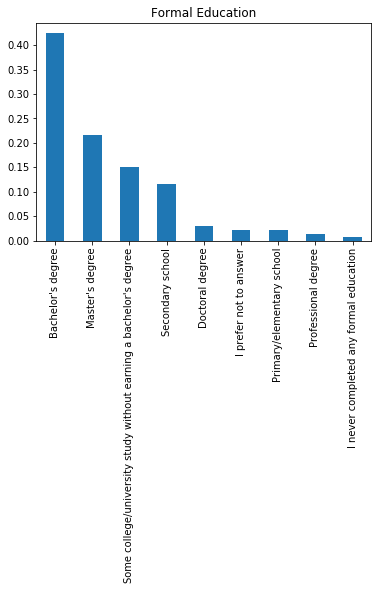

In [10]:
# Provide a pandas series of the counts for each FormalEducation status
# The below should be a bar chart of the proportion of individuals in your ed_vals
#if it is set up correctly
ed_vals = df['FormalEducation'].value_counts()
(ed_vals/df.shape[0]).plot(kind = 'bar');
plt.title("Formal Education");

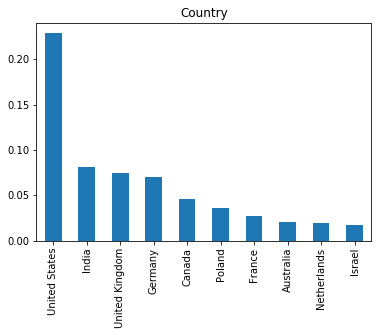

In [11]:
# Provide a pandas series of the different COUNTRY values in the dataset along with the count of how many individuals are from each Country.
#Store this pandas series in count_vals. If you are correct, you should see a bar chart of the proportion of individuals in each country
# The below should be a bar chart of the proportion of the top 10 countries for the individuals in your count_vals
#if it is set up correctly

count_vals = df['Country'].value_counts()
# :, This is called a slicer or slicing
(count_vals[:10]/df.shape[0]).plot(kind = 'bar');
plt.title("Country");

In [12]:
df.columns
df.shape

(19102, 154)

In [13]:
set(df.columns[np.sum(df.isnull()) == 0])

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

### What percent of coders went to University?

In [14]:
str((np.sum(df['University'] == 'No'))/df.shape[0] * 100) + '%'

'74.51052245838132%'

### How many people code as a hobby?

Text(0.5, 1.0, 'Do you Code as a Hobby?')

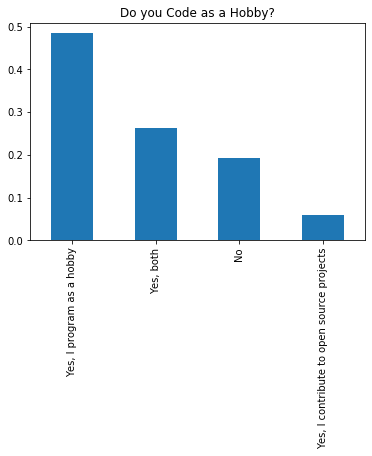

In [15]:
count_val = df['ProgramHobby'].value_counts()
(count_val/df.shape[0]).plot(kind ='bar');
plt.title('Do you Code as a Hobby?')

### What percentage are unemployed?

In [16]:
df['EmploymentStatus'].value_counts()

Employed full-time                                      13655
Independent contractor, freelancer, or self-employed     1866
Employed part-time                                       1168
Not employed, and not looking for work                   1066
Not employed, but looking for work                        906
I prefer not to say                                       381
Retired                                                    60
Name: EmploymentStatus, dtype: int64

In [17]:
Total = np.sum(df['EmploymentStatus'] == 'Not employed, and not looking for work')+np.sum(df['EmploymentStatus'] == 'Not employed, but looking for work')

In [18]:
str(Total/df.shape[0] * 100) + '%'

'10.323526332321222%'

## What are the top 5 currencies being paid?

In [21]:
df['Currency'].value_counts()

U.S. dollars ($)               2701
Euros (€)                      2179
British pounds sterling (£)     720
Indian rupees (?)               683
Canadian dollars (C$)           424
Polish zloty (zl)               301
Australian dollars (A$)         219
Russian rubles (?)              140
Swedish kroner (SEK)            139
Swiss francs                    131
Brazilian reais (R$)            122
Chinese yuan renminbi (¥)        61
Japanese yen (¥)                 60
South African rands (R)          56
Mexican pesos (MXN$)             49
Singapore dollars (S$)           25
Bitcoin (btc)                    22
Name: Currency, dtype: int64

Text(0.5, 1.0, 'What currency are you being paid in?')

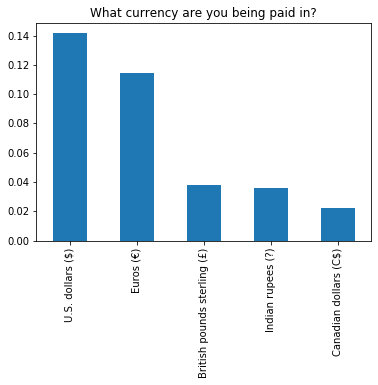

In [22]:
count_val = df['Currency'].value_counts()
(count_val[:5]/df.shape[0]).plot(kind ='bar');
plt.title('What currency are you being paid in?')

#  What are the top 3 races?

Text(0.5, 1.0, 'Race')

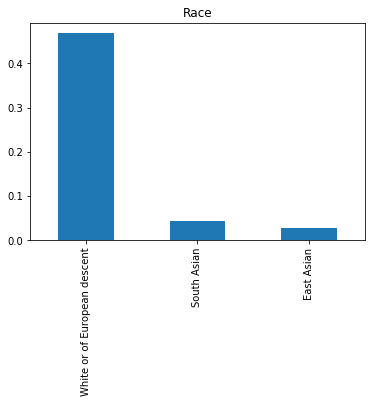

In [26]:
count_val = df['Race'].value_counts()
(count_val[:3]/df.shape[0]).plot(kind ='bar');
plt.title('Race')

In [39]:
count_val = df['Race'].value_counts()
str(count_val['Black or of African descent']/df.shape[0]  * 100) + '%'


'0.9318395979478589%'

In [40]:
count_val = df['Gender'].value_counts()
str(count_val['Female']/df.shape[0]  * 100) + '%'

'5.078002303423725%'

In [41]:
count_val_race = df['Race'].value_counts()
count_val_gender = df['Gender'].value_counts()
count_val_race['Black or of African descent'] and count_val_gender['Female']

970

In [42]:
df.shape

(19102, 154)